#  Naive Bayes for classifying Dieabetes patients
Aniket Jawale<br>
B.tech IT<br>
Roll no.36<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [3]:
data=pd.read_csv("diabetes2.csv") #Importing dataset

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.duplicated().sum()

0

<strong>No Duplicate values are present</strong>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<strong>No NULL values are present </strong>

<AxesSubplot:>

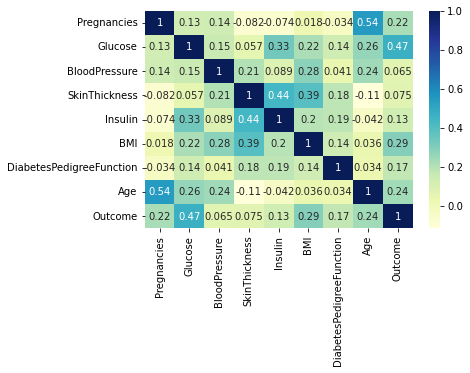

In [10]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

There is no any strong relation of Outcome variable with Independent variables

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

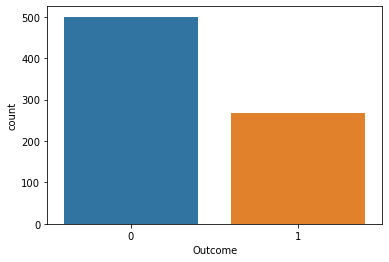

In [11]:
sns.countplot(data.Outcome)

Data May not be distrubuted correctly But It should not affect the result as There is No big variation

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'Outcome')])

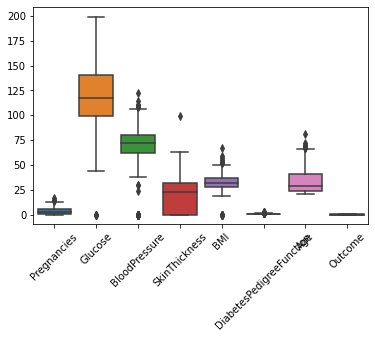

In [12]:
sns.boxplot(data=data.drop(columns=['Insulin']),)
plt.xticks(rotation=45)

Graph of How data is Distributed

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

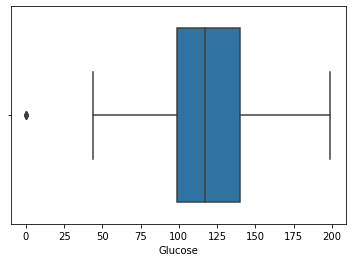

In [13]:
sns.boxplot(data.Glucose)

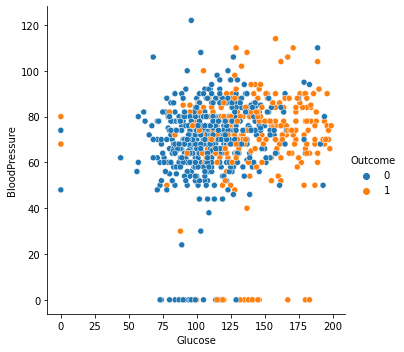

In [18]:

sns.relplot(
    data=data, x="Glucose", y="BloodPressure", hue="Outcome",
)

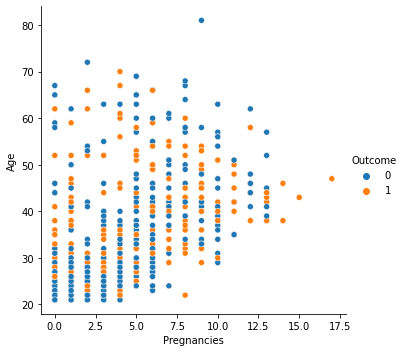

In [19]:
sns.relplot(
    data=data, x="Pregnancies", y="Age", hue="Outcome",
)

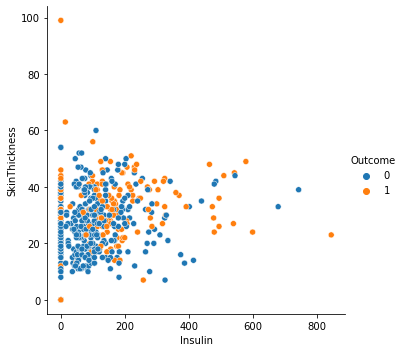

In [20]:
sns.relplot(
    data=data, x="Insulin", y="SkinThickness", hue="Outcome",
)

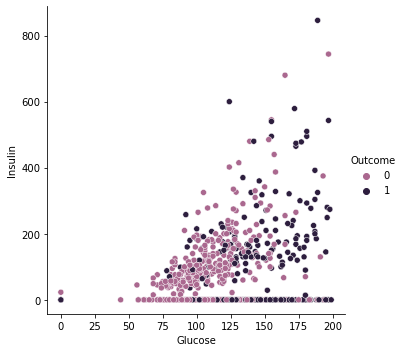

In [21]:
palette = sns.cubehelix_palette(light=.5, n_colors=2)
sns.relplot(
    data=data,
     x="Glucose", y="Insulin",
    hue="Outcome",  palette=palette,
)

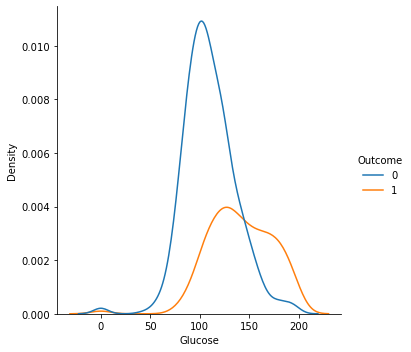

In [22]:
sns.displot(data, x="Glucose", hue="Outcome", kind="kde")

Conclusion of these Graph is we can see that value of glucose passes 150 there is huge chance that patient is having diabetes where insulin level also having some positive relation with diabetes

In [23]:
x=data.drop(columns=['Outcome'])

In [24]:
y=data.Outcome

# Model Preprocessing

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=57)

Tried both standardscaler and minmaxscaler but its not affecting the end result

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [28]:
scaler=MinMaxScaler()

In [29]:
data1=scaler.fit(X_train)

In [30]:
X_train1=scaler.transform(X_train)

In [31]:
scaler.fit(X_test)

MinMaxScaler()

Created a code to find best randomstate

In [32]:
# n=0
# o=0
# for i in range(100):
#     X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=i)
#     model=LogisticRegression()
#     model.fit(X_train,Y_train)
#     m=model.score(X_test,Y_test)
#     if(m>n):
#         n=m
#         o=i
# print(o,":",n)      
#74 for dropped blpre,skinthick
#57 for all
    

# Building the Model

In [33]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
# model=BernoulliNB()
# model=MultinomialNB()
model=GaussianNB()

In [34]:
model.fit(X_train,Y_train) #training the model

GaussianNB()

In [35]:
model.score(X_test,Y_test) 
#85 with removing blood pressure and Thickness
#84 without removing any column

0.8116883116883117

In [36]:
y_pred=model.predict(X_test)

# Testing the Model

In [37]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       105
           1       0.69      0.76      0.72        49

    accuracy                           0.81       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.82      0.81      0.81       154



Confusion Matrix with values

<AxesSubplot:>

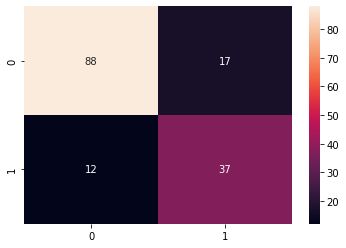

In [38]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True) 

Confusion Matrix with percentage

<AxesSubplot:>

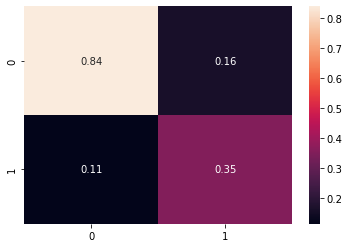

In [39]:
sns.heatmap(confusion_matrix(Y_test,y_pred)/105,annot=True)   

7 FN if we remove blood pressure and skin thickness<br>
9 if we didn't remove any column

In [40]:
a,b,c=roc_curve(Y_test,y_pred)

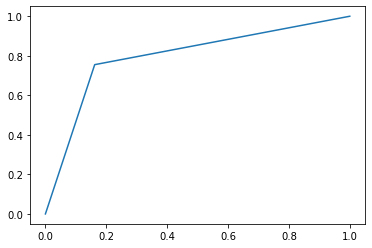

In [41]:
plt.plot(a,b)

In [42]:
auc(a,b)   #74 existing
#81 if we use all the columns
#80 if we drop blood pressure and sking thickness

0.7965986394557824

# Process
1.First we imported data<br>
2.insights with pandas like null values,duplicate values<br>
3.insights from graph like importance of glucose and insulin level<br>
4.corelations<br>
5.Data preprocessing<br>
6.Used Naive Bayes Algorithm<br>
7.accuracy score,precision,recall,f1 score,weighted average,confusion matrix,ROC cureve,Area under ROC curve<br>